In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import auc, roc_curve, roc_auc_score,  classification_report, precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.impute import KNNImputer
from helper_functions import *

In [8]:
# Load data and clean
'''
df = pd.read_csv('../data/conditions_df.csv')
to_drop = ['Date', 'Stn Id', 'Stn Name', 'CIMIS Region', 'Notes']
df.drop(to_drop, axis=1, inplace=True)
imputer = KNNImputer(n_neighbors=4, weights='distance')
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)
print(df.info())
scaled_df = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
'''

In [3]:
scaled_df = pd.read_csv('cleaned-conditions-data.csv')

In [5]:
y = scaled_df.pop('Target')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, stratify=y, test_size=.2)

In [7]:
scaled_df

,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,-1.141423,-0.184347,-1.225876,-0.916942,-0.811357,-1.150320,-1.072520,-0.115393,0.314685,0.207892,-0.792784,-0.020713,-0.520808,-1.087152
1,-1.372655,-0.184347,-1.691882,-0.893605,-1.052267,-0.943842,-1.119903,-0.229432,0.601725,0.304445,-0.784024,-0.025030,-0.594651,-1.068989
2,-1.372655,-0.184347,-1.702013,-0.660238,-0.965272,-0.978255,-0.906679,-0.286451,0.458205,0.352722,-0.503694,0.005187,0.046622,-1.068989
3,-1.025807,-0.134592,-1.225876,0.086537,-0.423225,0.002512,-0.361772,0.568839,0.601725,0.642380,0.249694,0.033246,0.682065,-0.914601
4,-1.025807,-0.184347,-1.124571,0.343241,-0.115396,-0.100727,-0.124856,0.568839,0.458205,0.545827,0.451181,-0.001288,-0.071916,-0.787457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149567,-0.563344,-0.184347,-0.785197,0.646618,0.466802,0.389657,0.277902,0.625858,-0.307233,0.304445,0.696470,-0.035822,-0.816182,0.683774
149568,-1.025807,-0.184347,-1.094179,0.973332,0.105438,0.320831,0.167341,0.682878,0.601725,0.787210,0.924238,-0.042297,-0.977472,0.602039
149569,-0.332112,-0.184347,-0.248277,1.066679,0.640792,0.165973,0.317388,0.739897,-0.020194,0.642380,0.985561,-0.046614,-1.074634,0.574794
149570,-0.678960,-0.184347,-0.623108,1.276710,0.513646,0.165973,0.285799,0.739897,0.314685,0.883763,1.116965,-0.057406,-1.288392,0.556630


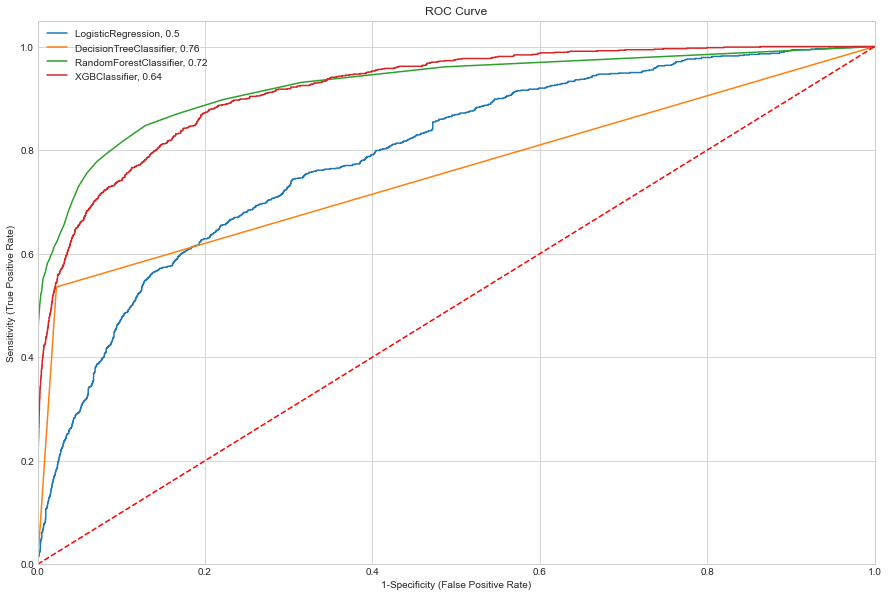

<Figure size 432x288 with 0 Axes>

In [20]:
classification_models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(class_weight='balanced'), XGBClassifier()]
model_comparison(classification_models, X_train, y_train, X_test, y_test)

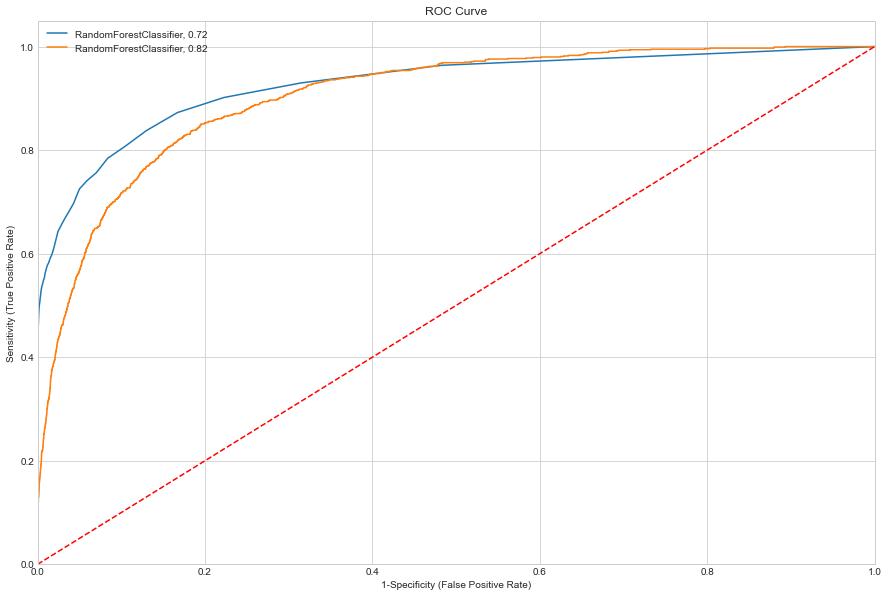

<Figure size 432x288 with 0 Axes>

In [21]:
tuned_rf = pickle.load(open('../models/tuned-rf.pkl', 'rb'))
rf_models = [RandomForestClassifier(class_weight='balanced'), tuned_rf]
model_comparison(rf_models, X_train, y_train, X_test, y_test)

[20:04:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:04:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




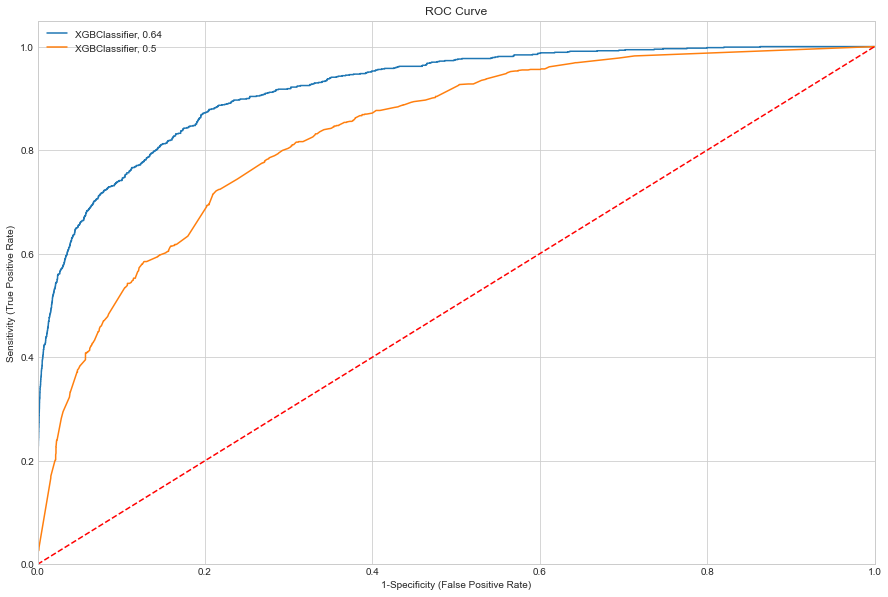

<Figure size 432x288 with 0 Axes>

In [22]:
tuned_xgb = pickle.load(open('../models/tuned-xgb.pkl', 'rb'))
xgb_models = [XGBClassifier(class_weight='balanced'), tuned_xgb]
model_comparison(xgb_models, X_train, y_train, X_test, y_test)

In [25]:
rf1 = RandomForestClassifier(class_weight='balanced')
rf1.fit(X_train, y_train)
y_pred1 = rf1.predict(X_test)
print('Out of box RF:')
print(classification_report(y_test, y_pred1))

tuned_rf.fit(X_train, y_train)
y_pred2 = tuned_rf.predict(X_test)
print('Tuned RF:')
print(classification_report(y_test, y_pred2))

Out of box RF:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     28918
         1.0       0.98      0.45      0.61       997

    accuracy                           0.98     29915
   macro avg       0.98      0.72      0.80     29915
weighted avg       0.98      0.98      0.98     29915

Tuned RF:
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     28918
         1.0       0.17      0.77      0.28       997

    accuracy                           0.87     29915
   macro avg       0.58      0.82      0.60     29915
weighted avg       0.96      0.87      0.90     29915



In [9]:
accuracy, precision, recall, f1 = cross_val(tuned_rf, X_train, y_train, X_test, y_test, splits=5)
print(f'Tuned Random Forest cross validation scores:\nAccuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nf1-score: {f1}')

Tuned Random Forest cross validation scores:
Accuracy: 0.8721345212686764
Precision: 0.17492367978196027
Recall: 0.7623802423018413
f1-score: 0.28452472356939573
